In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are several missing values for Age, two missing for Embarked, and the majority missing for Cabin.
* Age is filled in with the mean age as plots don't show any significant pattern to the missing values
* Embarked is filled in with S as there are only two missing and majority of each class board at S
* Cabin probably won't be used so drop the column


In [4]:
train_data.Age = train_data.Age.fillna(train_data.Age.mean())
train_data.Embarked = train_data.Embarked.fillna("S")
train_data.drop("Cabin", axis=1, inplace=True)

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# **Visualise some of the data**

Get a feel for the data
* Age distributions looks Gaussian, as expected, and is fairly similar across sex; the third class age distribution has a stronger peak at about 30 and has much fewer older passengers
* 

Text(0.5, 1.0, 'Age of passengers')

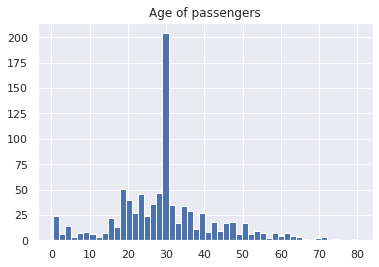

In [5]:
train_data.Age.hist(bins = 50)
plt.title("Age of passengers")

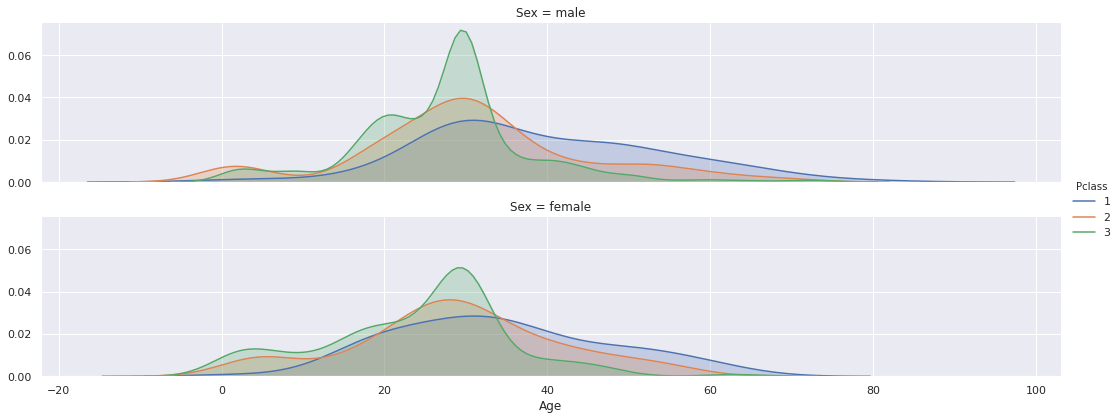

In [6]:
fg = sns.FacetGrid(train_data, hue='Pclass', aspect=5, row="Sex")
fg.map(sns.kdeplot,'Age',shade=True)
fg.add_legend()

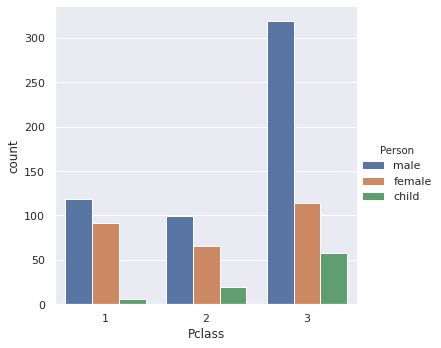

In [7]:
# Add a predictor for whether a passenger is man/woman/child

def find_children(passenger):
    """
    For a given row, return Male/Female/Child.
    """
    if passenger.Age <16:
        return "child"
    else:
        return passenger.Sex

train_data["Person"] = train_data[["Age","Sex"]].apply(find_children,axis=1)

sns.catplot("Pclass", data=train_data, hue="Person", kind="count")

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


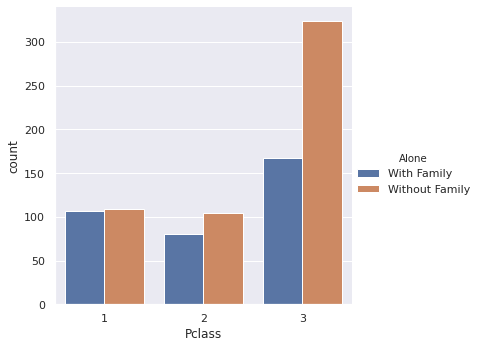

In [8]:
# Add a predictor for whether a passenger is alone or not - i.e. combine parent/child and sibs/spouse cols

train_data["Alone"] = train_data.Parch + train_data.SibSp

train_data["Alone"].loc[train_data["Alone"]>0] = "With Family"
train_data["Alone"].loc[train_data["Alone"] == 0] = "Without Family"

sns.catplot("Pclass", data=train_data, hue="Alone", kind="count")

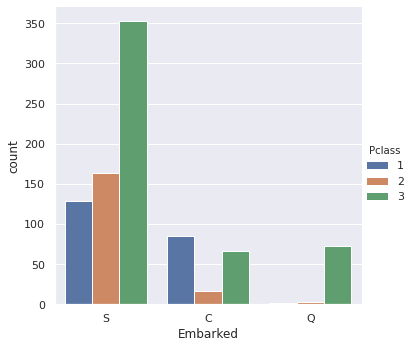

In [9]:
sns.catplot("Embarked", data=train_data, hue="Pclass", kind="count")

Now we look at plots of survival 

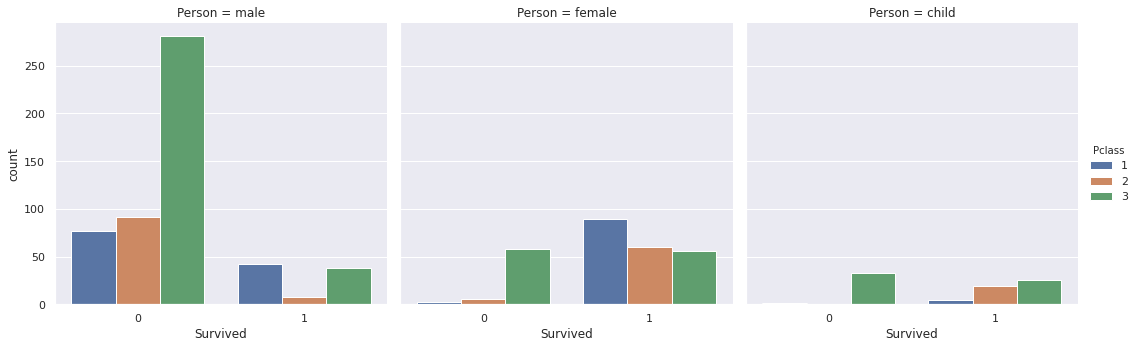

In [10]:
sns.catplot("Survived", data=train_data, hue="Pclass", col="Person", kind="count")

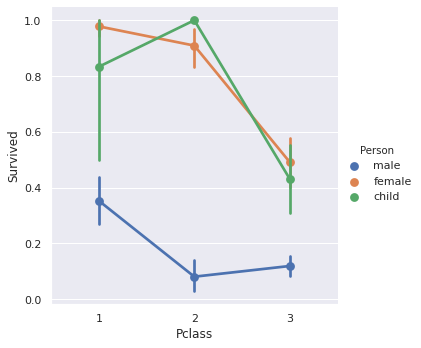

In [11]:
sns.catplot("Pclass", "Survived", data=train_data, hue="Person", kind="point")

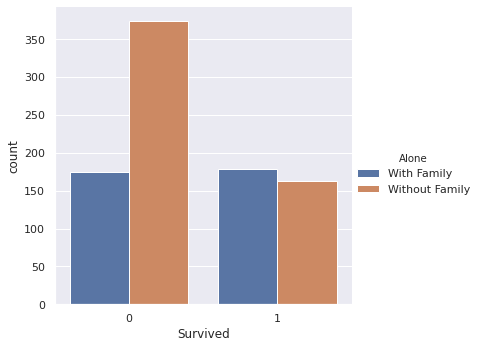

In [12]:
sns.catplot("Survived", data=train_data, hue="Alone", kind="count")

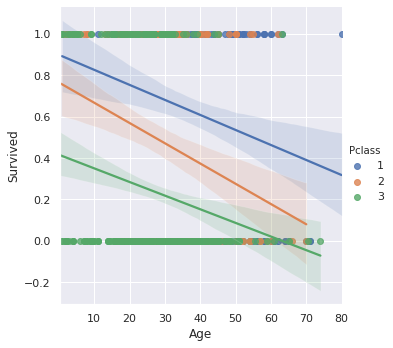

In [13]:
sns.lmplot("Age", "Survived", data=train_data, hue="Pclass")

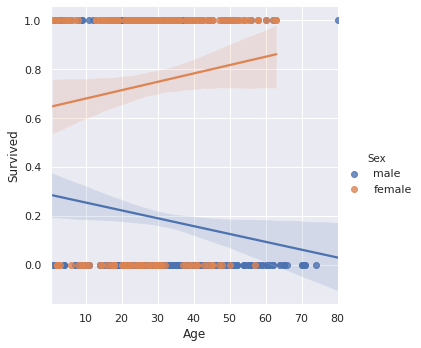

In [14]:
sns.lmplot("Age", "Survived", data=train_data, hue="Sex")

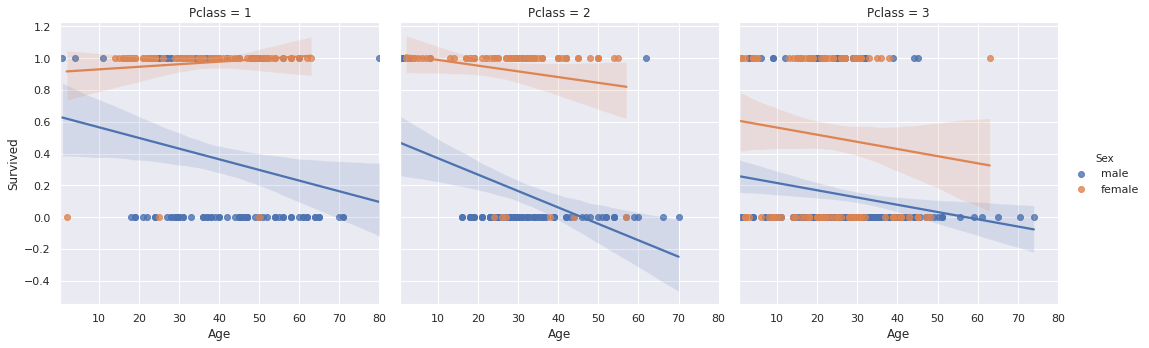

In [15]:
sns.lmplot("Age", "Survived", data=train_data, hue="Sex", col="Pclass")

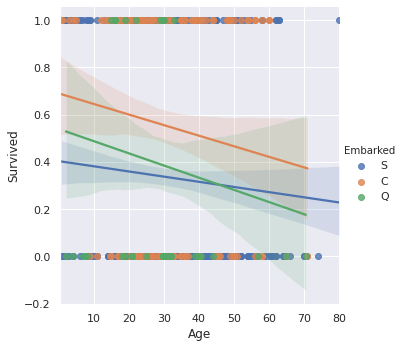

In [16]:
sns.lmplot("Age", "Survived", data=train_data, hue="Embarked")

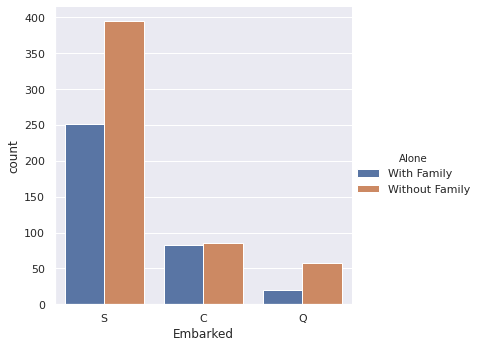

In [17]:
sns.catplot("Embarked", data=train_data, hue="Alone", kind="count")

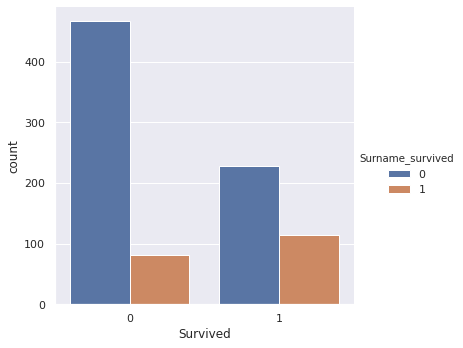

In [18]:
train_data["Surname"] = train_data.Name.str.extract("([A-za-z]+)\,", expand=False)

def find_surname_survival(passenger):
    """
    For a given row, return whether any other members of the passengers family survived (known for the training data).
    """
    if train_data.loc[(train_data.Surname == passenger.Surname) & (train_data.Name != passenger.Name), "Survived"].sum() > 0:
        return 1
    else:
        return 0

train_data["Surname_survived"] = train_data.apply(find_surname_survival, axis=1)

sns.catplot("Survived", data=train_data, hue="Surname_survived", kind="count")